In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import joblib


In [3]:
# Read the dataset
df = pd.read_csv("electricmotor-dataset.csv")
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17.0
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17.0
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17.0
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17.0
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17.0


Uni-variate analysis

<Axes: xlabel='profile_id'>

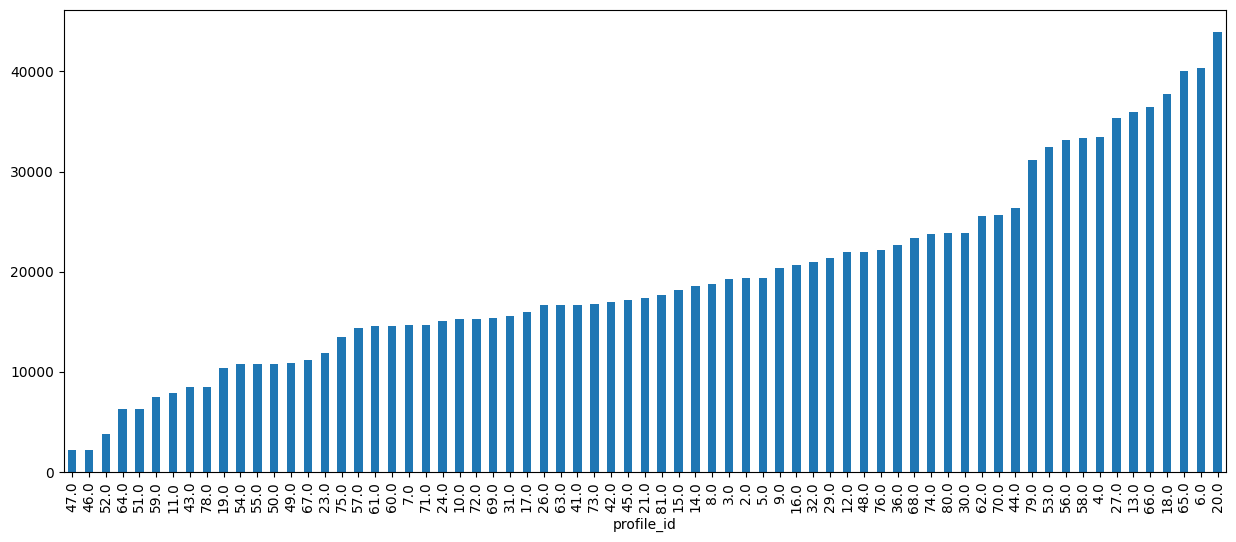

In [ ]:
#BAR GRAPH
plt.figure(figsize=(15,6))
df['profile_id'].value_counts().sort_values().plot(kind='bar')

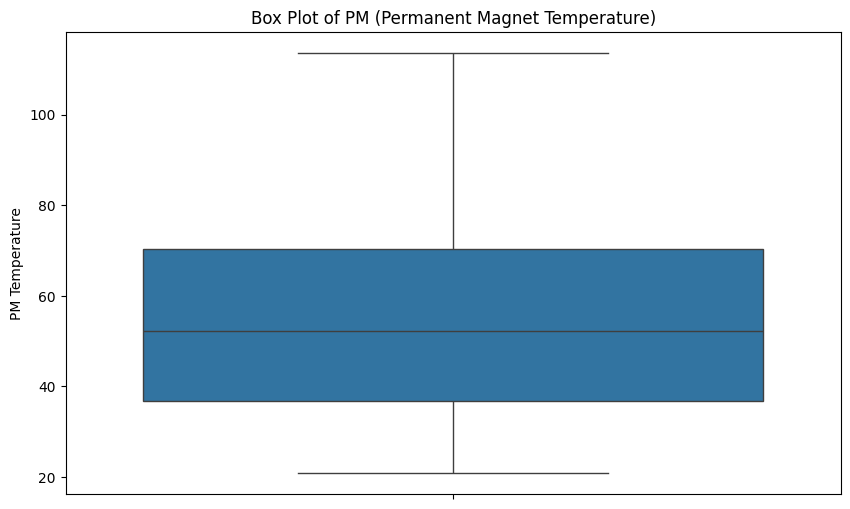

In [4]:
#Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['pm'])
plt.title('Box Plot of PM (Permanent Magnet Temperature)')
plt.ylabel('PM Temperature')
plt.show()

In [ ]:
df.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

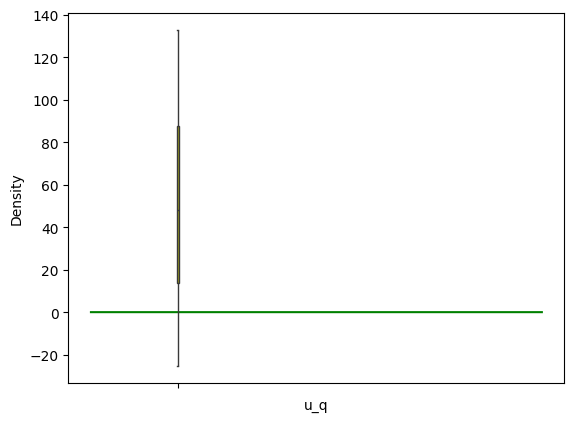

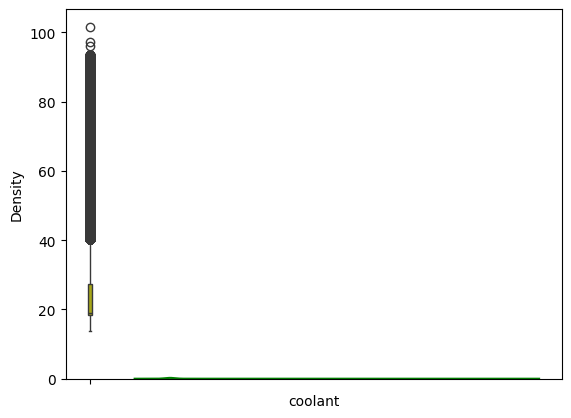

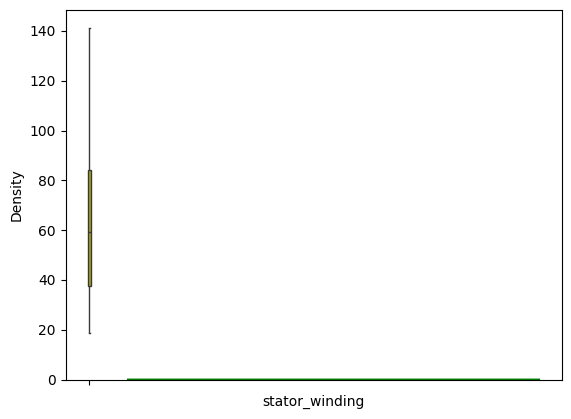

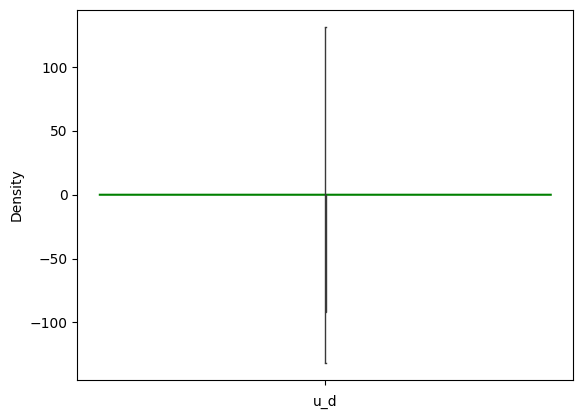

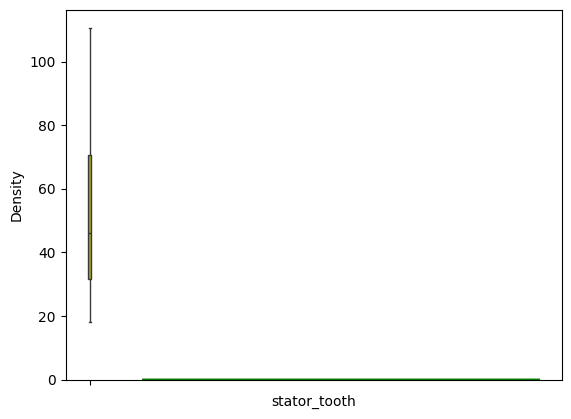

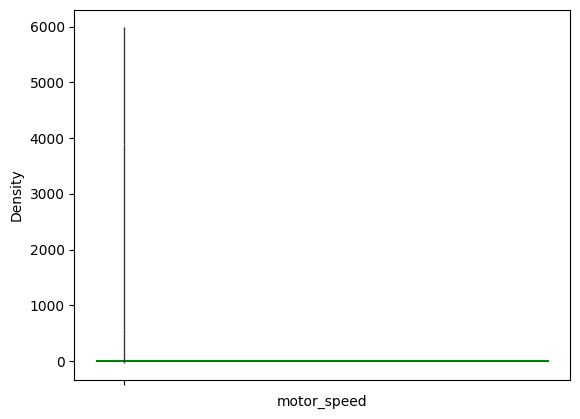

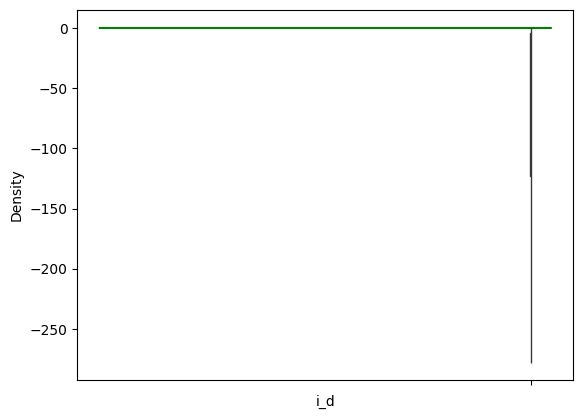

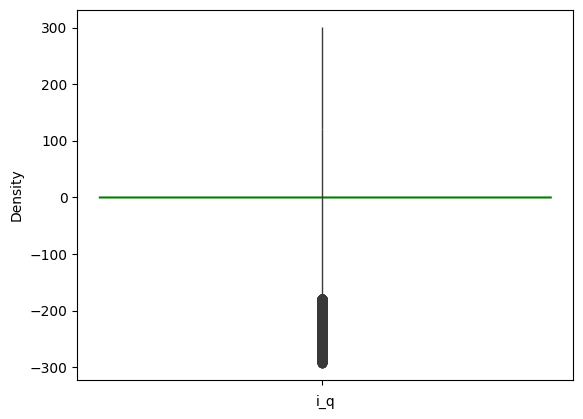

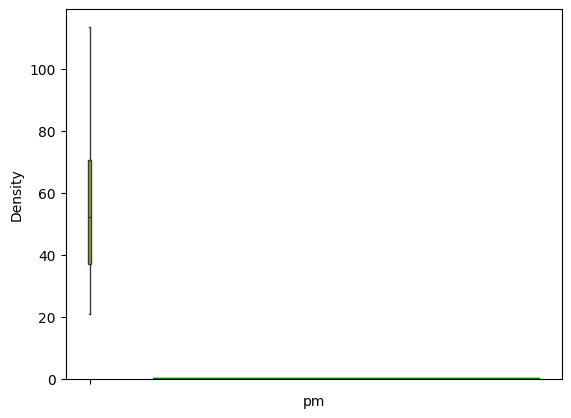

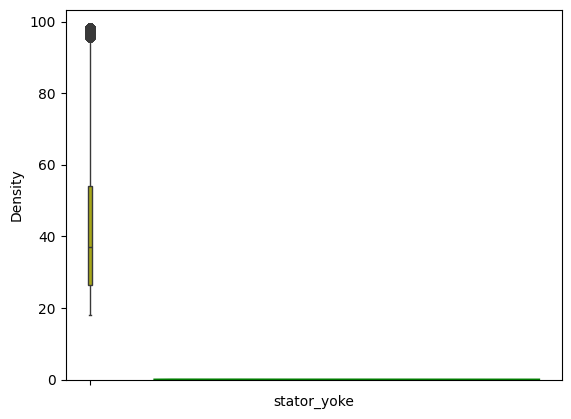

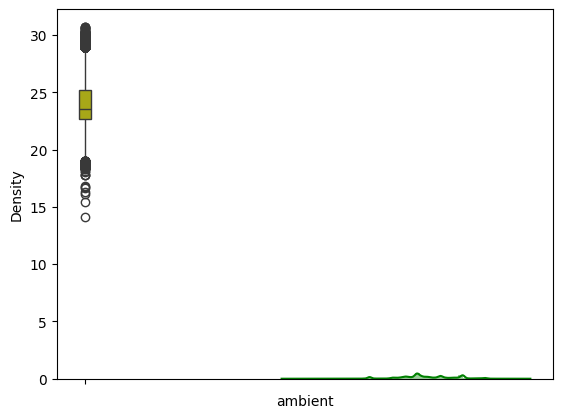

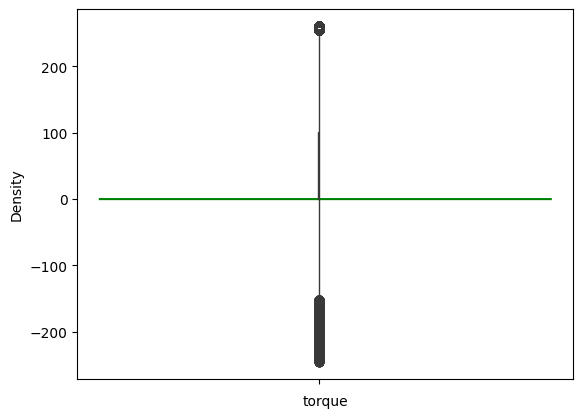

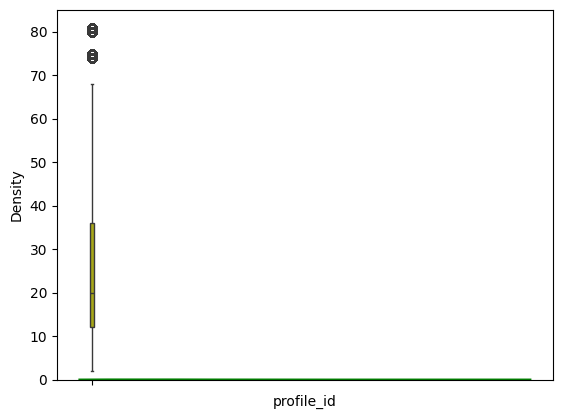

In [6]:
#Distribution plot
for i in df.columns:
    sns.distplot(df[i], color='g')
    sns.boxplot(y=df[i], color = 'y')
    plt.vlines(df[i].mean(), ymin = 1, ymax = 1, color = 'r')
    plt.show()

Multi-variate analysis

<Axes: xlabel='i_q', ylabel='pm'>

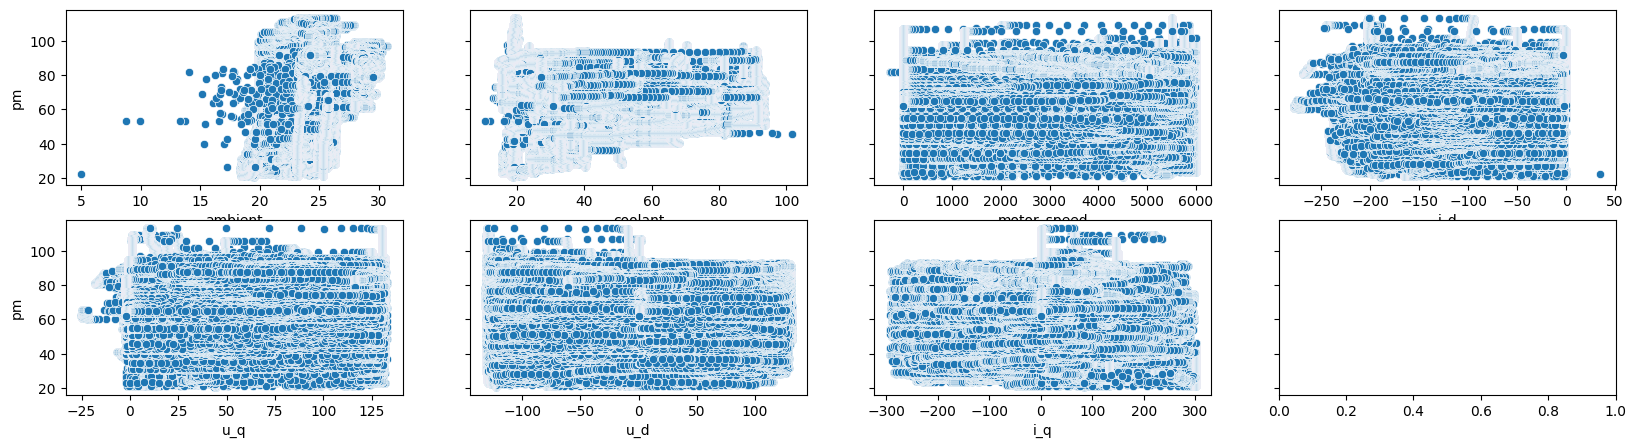

In [ ]:
#Scatterplot
fig,axes=plt.subplots(2,4,figsize=(20,5),sharey=True)
sns.scatterplot(x='ambient',y='pm',data=df,ax=axes[0,0])
sns.scatterplot(x='coolant',y='pm',data=df,ax=axes[0][1])
sns.scatterplot(x='motor_speed',y='pm',data=df,ax=axes[0][2])
sns.scatterplot(x='i_d',y='pm',data=df,ax=axes[0][3])
sns.scatterplot(x='u_q',y='pm',data=df,ax=axes[1][0])
sns.scatterplot(x='u_d',y='pm',data=df,ax=axes[1][1])
sns.scatterplot(x='i_q',y='pm',data=df,ax=axes[1][2])

<Axes: >

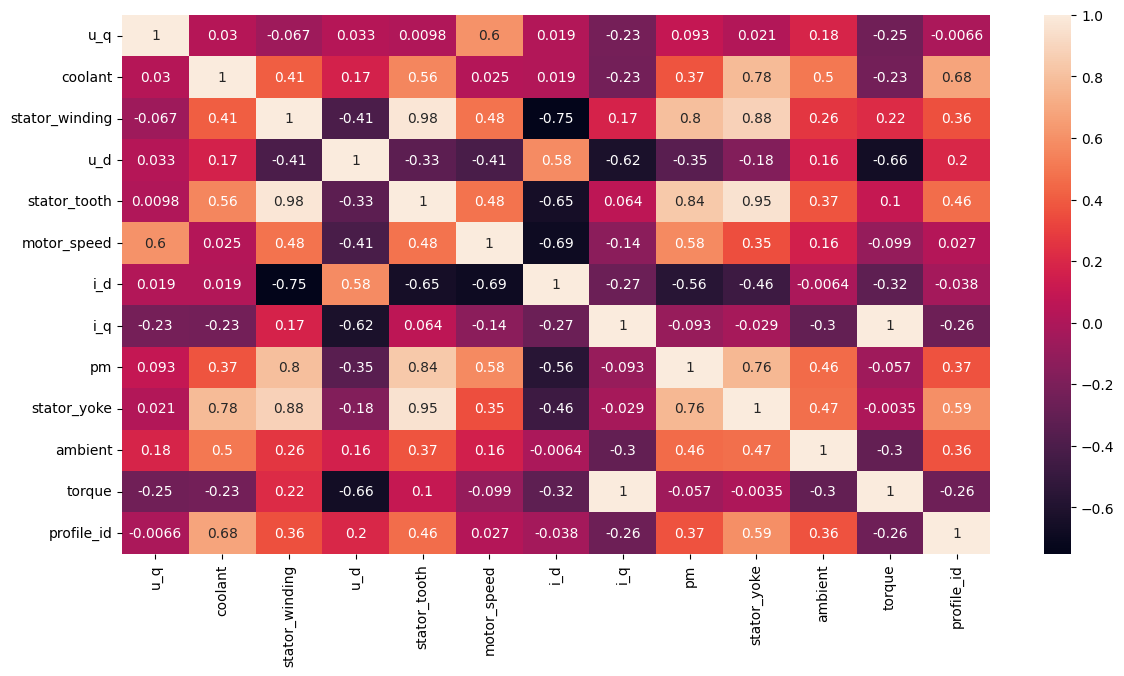

In [7]:
#Heat-map
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)

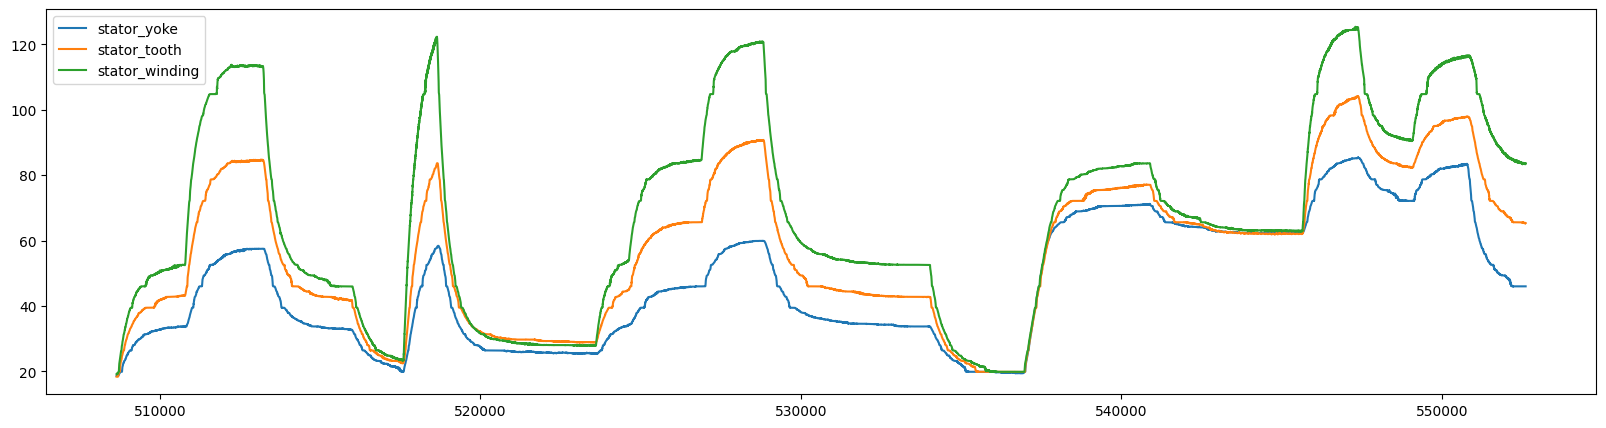

In [ ]:
#
plt.figure(figsize=(20,5))
df[df['profile_id']==20]['stator_yoke'].plot(label='stator_yoke')
df[df['profile_id']==20]['stator_tooth'].plot(label='stator_tooth')
df[df['profile_id']==20]['stator_winding'].plot(label='stator_winding')
plt.legend()


Descriptive analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335430 entries, 0 to 1335429
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1335430 non-null  float64
 1   coolant         1335430 non-null  float64
 2   stator_winding  1335430 non-null  float64
 3   u_d             1335430 non-null  float64
 4   stator_tooth    1335430 non-null  object 
 5   motor_speed     1335430 non-null  float64
 6   i_d             1335430 non-null  float64
 7   i_q             1335430 non-null  float64
 8   pm              1335430 non-null  float64
 9   stator_yoke     1335430 non-null  float64
 10  ambient         1335430 non-null  float64
 11  torque          1335429 non-null  float64
 12  profile_id      1335429 non-null  float64
dtypes: float64(12), object(1)
memory usage: 132.5+ MB


In [ ]:
df.isnull().sum()

,0
u_q,0
coolant,0
stator_winding,0
u_d,0
stator_tooth,0
motor_speed,0
i_d,0
i_q,0
pm,0
stator_yoke,0


In [ ]:
df.describe()

,u_q,coolant,stator_winding,u_d,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.335430e+06,1.335430e+06,1.335430e+06,1.335430e+06,1.335430e+06,1.335430e+06,1.335430e+06,1.335430e+06,1.335430e+06,1.335430e+06,1.335429e+06,1.335429e+06
mean,5.426389e+01,3.616935e+01,6.619093e+01,-2.504803e+01,2.197927e+03,-6.848627e+01,3.728732e+01,5.841163e+01,4.809046e+01,2.456028e+01,3.099912e+01,4.066942e+01
std,4.409760e+01,2.177286e+01,2.873838e+01,6.299973e+01,1.857788e+03,6.493911e+01,9.204716e+01,1.903758e+01,2.002505e+01,1.928180e+00,7.702382e+01,2.509024e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,5.796527e-02,5.000000e+00,-2.464667e+02,2.000000e+00
25%,1.207658e+01,1.869605e+01,4.276430e+01,-7.796006e+01,3.409742e+02,-1.151326e+02,1.095880e+00,4.297162e+01,3.169089e+01,2.318385e+01,-1.280454e-01,1.700000e+01
50%,4.898172e+01,2.684264e+01,6.495946e+01,-7.043047e+00,1.999976e+03,-5.073166e+01,1.577386e+01,6.017595e+01,4.554666e+01,2.479442e+01,1.083900e+01,4.300000e+01
75%,8.978330e+01,4.985182e+01,8.800554e+01,1.467925e+00,3.749970e+03,-2.979376e+00,1.003974e+02,7.195563e+01,6.139138e+01,2.620967e+01,9.076136e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,6.000015e+03,3.484560e+01,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
u_q,0
coolant,0
stator_winding,0
u_d,0
stator_tooth,0
motor_speed,0
i_d,0
i_q,0
pm,0
stator_yoke,0


Data Pre-processing

In [ ]:
# Drop unwanted features
df = df.drop(['stator_yoke','stator_tooth','stator_winding','torque'], axis=1)



In [8]:
df.isnull().sum()

,0
u_q,0
coolant,1
stator_winding,1
u_d,1
stator_tooth,1
motor_speed,1
i_d,1
i_q,1
pm,1
stator_yoke,1


In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

,0
u_q,0
coolant,0
stator_winding,0
u_d,0
stator_tooth,0
motor_speed,0
i_d,0
i_q,0
pm,0
stator_yoke,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import joblib



In [12]:
# Define features and target
X = df[['ambient','coolant','u_d','u_q','motor_speed','i_d','i_q']]
y = df['pm']



In [13]:
# Split first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=3
)



In [14]:
# Scale AFTER split
mm = MinMaxScaler()

X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)



In [15]:
# Save scaler
joblib.dump(mm, 'transform.save')



['transform.save']

In [19]:
# Models
lr = LinearRegression()
dr = DecisionTreeRegressor()
rf = RandomForestRegressor(max_depth=10, random_state=42)
svm = SVR()

In [ ]:
# Train
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
dr.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
svm.fit(X_train, y_train)

In [ ]:
# Predict
p1 = lr.predict(X_test)
p2 = dr.predict(X_test)
p3 = rf.predict(X_test)
p4 = svm.predict(X_test)



In [ ]:
# Evaluate
print("Linear Regression R2:", r2_score(y_test, p1))
print("Decision Tree R2:", r2_score(y_test, p2))
print("Random Forest R2:", r2_score(y_test, p3))
print("SVM R2:", r2_score(y_test, p4))



In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, p2))
print("Decision Tree RMSE:", rmse)
print("Linear Regression RMSE:",np.sqrt(mean_squared_error(y_test, p1)))
print("Random Forest RMSE:",np.sqrt(mean_squared_error(y_test, p3)))
print("SVM RMSE:",np.sqrt(mean_squared_error(y_test, p4)))

In [ ]:
# Save best model (Decision Tree)
joblib.dump(dr, "model.save")
joblib.dump(mm, "transform1.save")

['transform1.save']

In [ ]:
import joblib
import numpy as np

#  Load the saved scaler and model
scaler = joblib.load('transform.save')
model = joblib.load('model.save')

ambient = float(input("Enter ambient temperature: "))
coolant = float(input("Enter coolant temperature: "))
u_d = float(input("Enter u_d value: "))
u_q = float(input("Enter u_q value: "))
motor_speed = float(input("Enter motor speed: "))
i_d = float(input("Enter i_d value: "))
i_q = float(input("Enter i_q value: "))

# -------------------------------
#  Prepare Input for Model
# -------------------------------
user_input = np.array([[ambient, coolant, u_d, u_q, motor_speed, i_d, i_q]])

# Scale input using SAME scaler
user_input_scaled = scaler.transform(user_input)

# -------------------------------
#  Predict
# -------------------------------
prediction = model.predict(user_input_scaled)

print("----------------------------------")
print("Predicted PM Temperature:", prediction[0])

if prediction[0] < 60:
    print("Status: ✅ Normal Temperature")

elif 60 <= prediction[0] < 100:
    print("Status: ⚠ High Temperature - Monitor Closely")
else:
    print("Status: 🔥 OVERHEATING RISK - Take Action Immediately!")